### Data - Mall_Coustomer

#### insights :
##### *Find the good, best, better coustomer*
##### *Mall coustomer not showing same behaviour*
##### *High Income - High Spending : Valuale Coustomer*
##### *Low Income- High spending : mostly young Coustomer*
##### *High Income- Low spending : Value-conscious Coustomer*
##### *Low income- Low spending : not effective marketing cost*

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mall = pd.read_csv('Mall_Customers.csv')

In [4]:
mall_customer = mall.copy()

#### Data Understanding / EDA

In [5]:
mall_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
mall_customer['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [10]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
mall_customer.shape

(200, 5)

##### Univariate Analysis

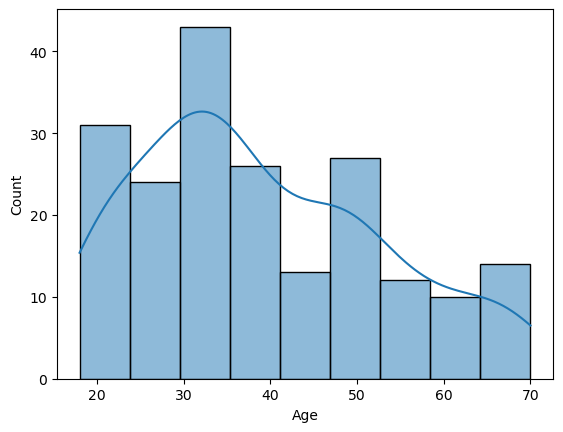

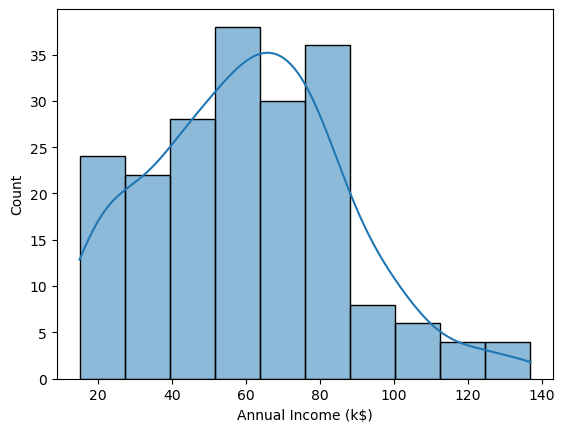

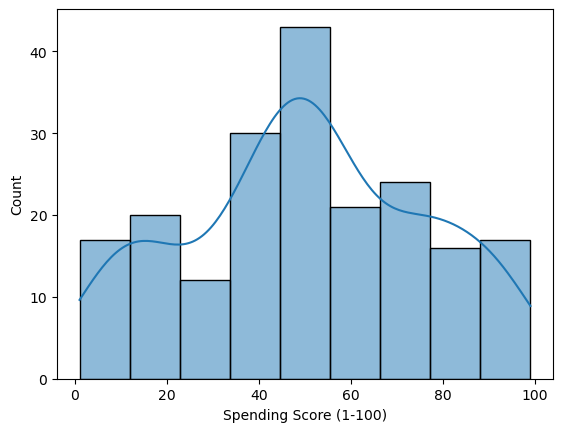

In [14]:
sns.histplot(mall_customer['Age'],kde=True)
plt.show()

sns.histplot(mall_customer['Annual Income (k$)'],kde=True)
plt.show()

sns.histplot(mall_customer['Spending Score (1-100)'],kde=True)
plt.show()

##### Bivariate Analysis

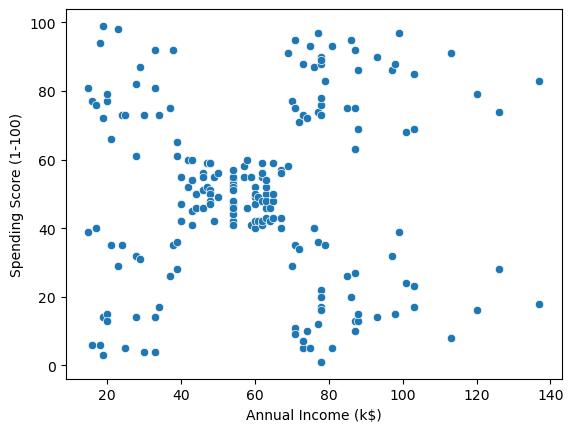

In [16]:
sns.scatterplot(data=mall_customer,
                x='Annual Income (k$)',
                y='Spending Score (1-100)')
plt.show()

##### Scaling

In [20]:
x = mall_customer[['Annual Income (k$)','Spending Score (1-100)']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Elbow method

In [23]:
from sklearn.cluster import KMeans

wcss = [ ]
for k in range(1,11):
    Kmeans = KMeans(n_clusters=k,random_state=42)
    Kmeans.fit(x_scaled)
    wcss.append(Kmeans.inertia_)

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

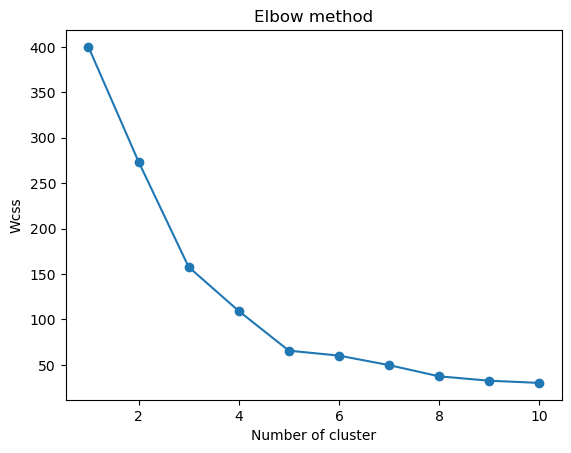

In [26]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Wcss')
plt.title('Elbow method')
plt.show()

##### Apply K-Means

In [27]:
Kmeans = KMeans(n_clusters=5,random_state=42)
mall_customer['cluster'] = Kmeans.fit_predict(x_scaled)

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
mall_customer.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2


##### Cluster visualization

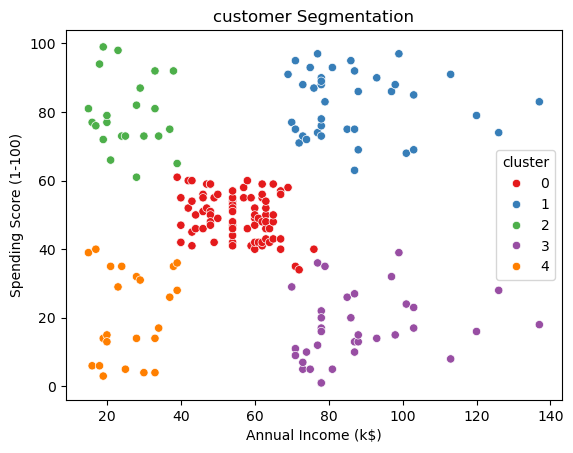

In [33]:
sns.scatterplot(data=mall_customer,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='cluster',palette='Set1')
plt.title("customer Segmentation")
plt.show()

#### Cluster Interpretation

In [34]:
mall_customer.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4


In [35]:
mall_customer.groupby('cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [37]:
mall_customer.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.085724
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.003475
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.101491
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.488733
cluster,-0.085724,-0.003475,-0.101491,-0.488733,1.000000
